**CÓDIGO 1: Ecuación de Schrodinger Independiente del Tiempo en 1D, Diferencias Finitas: Potencial Armónico.**

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

-Construcción del potencial

Comentario: 5000 = m^2*w^2*L^4 / hbar^2 -----> w = 8.18601×10^15 s-1

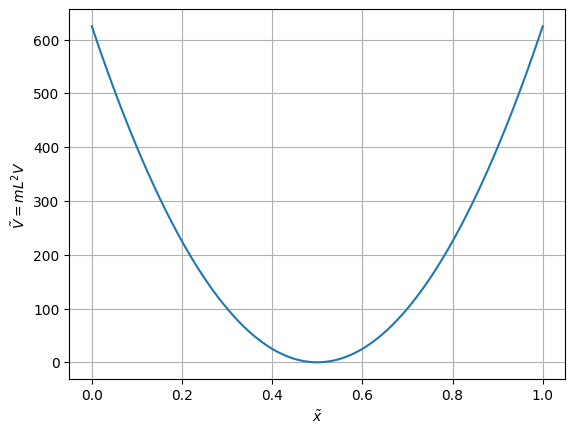

In [ ]:
#Definimos el número de puntos de discretización N y el paso h.

N=10000
h=1/N

#Definimos el vector que discretiza el dominio [0,1]

x=np.linspace(0,1,N+1)

#Definimos el potencial Vtilda=mL^2V
#Potencial tipo confinante (armónico)

def Vtilda(x):
    return 5000*0.5*(x-0.5)**2 

#Graficamos el potencial

V=Vtilda(x)
plt.plot(x,V)
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\tilde{V}=mL^2V$')   
plt.grid(True)

NOTA: Con el factor 1000 lo que estamos haciendo realmente es que mL^2=1000, es decir, que la longitud del intervalo sea lo suficientemente grande para que el potencial en los extremos sea grande en comparación con la energía promedio de la función de onda y por tanto como la función de onda decae exponencialmente se tendrá que podremos tomar como condiciones de contorno que la función de onda en dichos extremos sea 0, por eso vemos que si aumentamos el factor mL^2 las funciones de onda se comprimen más o lo que es lo mismo decaen más rápidamente. Es importante no confundir las variables x y xtilda, xtilda es la coordenada espacial adimensionalizonada.

-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [84]:
#Definimos la diagonal principal sin incluir el primer y último elemento
#[1:-1] toma todos los elementos de Vtilda menos el primero y el último

d=1/h**2+Vtilda(x)[1:-1]

#Definimos la diagonal superior e inferior

e=-1/(2*h**2)*np.ones(len(d)-1)

#Calculamos los autovalores almacenados en  w y los autovectores en v por columnas

w,v=eigh_tridiagonal(d,e) #eigh_tridiagonal permite calcular autovalores y autovectores de una matriz tridiagonal sin necesidad de construirla

-Gráfica de las densidades de probabilidad y funciones de onda

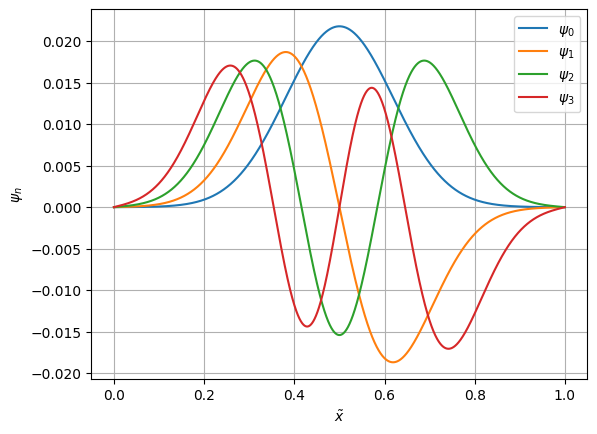

In [85]:
plt.plot(x[1:-1],v.T[0],label=r'$\psi_0$')
plt.plot(x[1:-1],v.T[1],label=r'$\psi_1$')
plt.plot(x[1:-1],v.T[2],label=r'$\psi_2$')
plt.plot(x[1:-1],v.T[3],label=r'$\psi_3$')
plt.legend()
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\psi_n$') 
plt.grid(True)

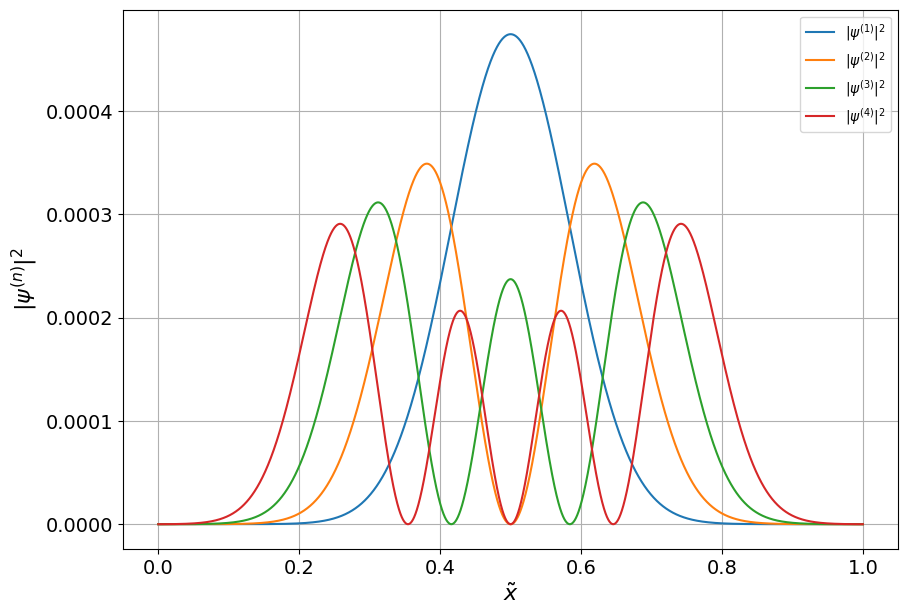

In [86]:
plt.figure(figsize=(10, 7))

for n in range(4):  # los cuatro primeros estados
    plt.plot(x[1:-1], v.T[n]**2, label=fr"$|\psi^{{({n+1})}}|^2$")

plt.legend(loc='upper right')
plt.xlabel(r'$\tilde{x}$', fontsize=16)                    
plt.ylabel(r'$|\psi^{(n)}|^2$', fontsize=16) 
plt.xticks(fontsize=14)                   # números eje X
plt.yticks(fontsize=14)    
plt.grid(True)
plt.show()


SOLUCIONES ANALÍTICAS:


-Cálculo de los autovalores/energías propias

E_0 = 35.355344
E_1 = 106.066236
E_2 = 176.780185
E_3 = 247.520899
E_4 = 318.418446
E_5 = 389.957486
E_6 = 463.365623
E_7 = 540.746339
E_8 = 624.547885
E_9 = 716.739969


Text(0, 0.5, '$mL^2E/\\hbar^2$')

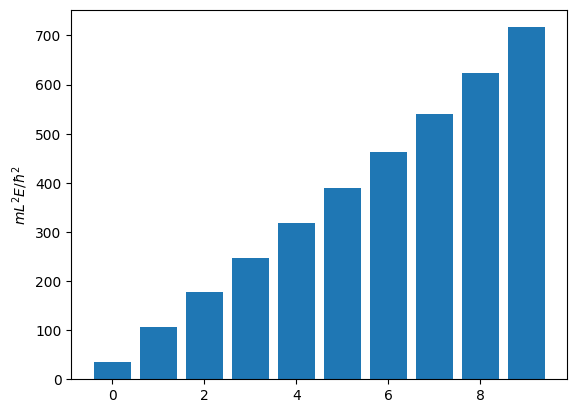

In [87]:
#Mostramos los primeros 10 autovalores
for i in range(10):
    print(f'E_{i} = {w[i]:.6f}')

plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2E/\hbar^2$') #Realmente estamos obteniendo Etilda=mL^2E y se debe dividir por hbar^2 para que tenga sentido dimensionalmente

E_1 = 2.6941 eV
E_2 = 8.0822 eV
E_3 = 13.4706 eV
E_4 = 18.8610 eV
E_5 = 24.2634 eV
E_6 = 29.7146 eV
E_7 = 35.3083 eV
E_8 = 41.2047 eV
E_9 = 47.5903 eV


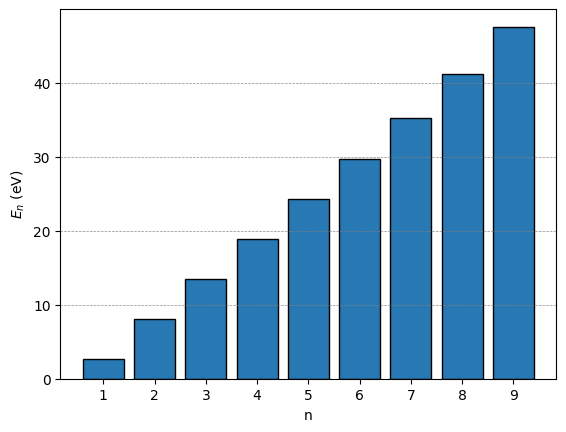

In [ ]:
# Constantes físicas
hbar = 1.054_571_817e-34  # J·s
eV   = 1.602_176_634e-19  # J/eV

# Parámetros físicos
m      = 9.109_383_7015e-31  # kg (masa del electrón)
L_phys = 1e-9             # m (1 nm de ancho de pozo)

# Conversión de autovalores adimensionales a reales
#   w = (m L^2 / ħ^2) * E   ⇒   E = (ħ^2 / m L^2) * w
E_J  = (hbar**2) * w / (m * L_phys**2)  # en Joule
E_eV = E_J / eV                         # en eV

n = np.arange(1, 10)
# Mostrar los primeros 10 autovalores
for i in range(9):
    print(f'E_{i+1} = {E_eV[i]:.4f} eV')

# Graficar en mismo estilo que tu código original
plt.bar(n, E_eV[:9], color="#2778b3", edgecolor="black")
plt.ylabel(r'$E_n$ (eV)')
plt.xlabel("n")
plt.xticks(n)  # ticks de 1 en 1, empezando en 1
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray", alpha=0.9)
plt.show()


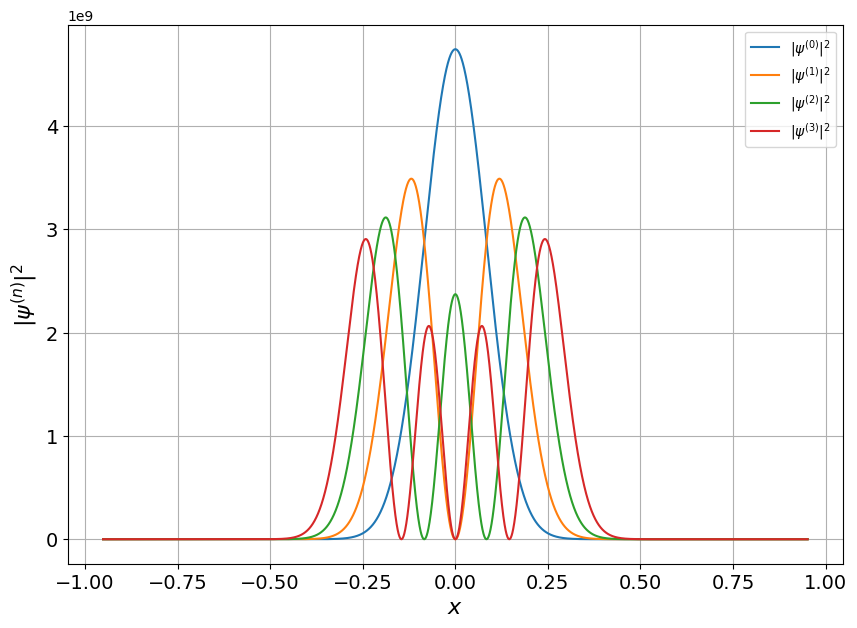

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial

# Constantes físicas
hbar = 1.054_571_817e-34  # J·s
m    = 9.109_383_7015e-31 # kg (masa del electrón)
omega = 8.18601e15        # s^-1 (frecuencia angular)

# Longitud característica
a = np.sqrt(hbar/(m*omega))

# Autofunción analítica normalizada
def psi_n(x, n):
    xi = x/a
    Hn = hermite(n)
    norm = 1.0/np.sqrt((2**n)*factorial(n)) * (1.0/np.pi)**0.25 / np.sqrt(a)
    return norm * np.exp(-xi**2/2.0) * Hn(xi)

# Rango espacial grande en metros (cubre "todo R" de forma práctica)
x = np.linspace(-8*a, 8*a, 4000)

# Graficar densidades de probabilidad para n=0,1,2,3
plt.figure(figsize=(10, 7))
for n in range(4):
    plt.plot(x*1e9, np.abs(psi_n(x,n))**2, label=rf"$|\psi^{{({n})}}|^2$")

plt.legend(loc='upper right')
plt.xlabel(r"$x$", fontsize=16)
plt.ylabel(r"$|\psi^{(n)}|^2$", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()




E_1 = 2.6941 eV
E_2 = 8.0822 eV
E_3 = 13.4703 eV
E_4 = 18.8584 eV
E_5 = 24.2466 eV
E_6 = 29.6347 eV
E_7 = 35.0228 eV
E_8 = 40.4109 eV
E_9 = 45.7990 eV


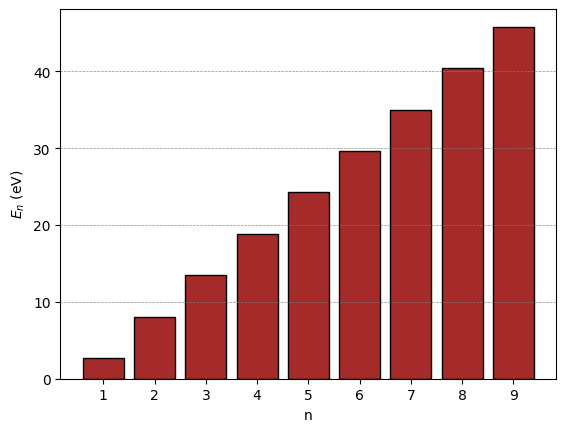

In [103]:

# Constantes físicas
hbar = 1.054_571_817e-34   # J·s
eV   = 1.602_176_634e-19   # J/eV

# Parámetros físicos
omega = 8.186e15           # s^-1 (frecuencia angular del oscilador)

# Autovalores: usar n = 0..8 para incluir el fundamental
n = np.arange(0, 9)  # 0,1,...,8
E_J  = hbar * omega * (n + 0.5)
E_eV = E_J / eV

# Mostrar los 9 primeros autovalores
for i in range(9):
    print(f"E_{i+1} = {E_eV[i]:.4f} eV")

# Etiquetas del eje x: 1..9
n_labels = np.arange(1, 10)

# Graficar con etiquetas 1..9 en el eje x
plt.bar(n_labels, E_eV, color="brown", edgecolor="black")
plt.ylabel(r"$E_n$ (eV)")
plt.xlabel("n")
plt.xticks(n_labels)
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray", alpha=0.9)
plt.show()

